
# Social Network Analysis 2023/2024 Group B
### **Movie:** Catch Me If You Can
**Group Members:**
- Martina Fagnani
- Shefik Memedi
- Yassir El Arrag
- Leonardo Farfan
- Edoardo Brown

# **Introduction**

Below we are going to import the packages. First we import a Python library called Networkx for creating and analyzing networks, then we import the Matplotlib for the visualizaton, then we import NumPy which is a library for numerical operations and data manipulation, then we import the CSV module for reading and writing CSV files, and last we import the ast module that we will use for parsing Python literals for strings.

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import ast
import time
import math
import random
from operator import itemgetter

# **Week 1**

## Building The Graph

The code below creates an undirected graph. It opens the 'nodes.csv' file, which contains informations about the nodes, it uses the CSV reader to parse the file, treating each row as a list of length equal to the number of columns, the code iterates over the rows, for each row it adds the corresponding node with its label to the graph. After adding the node, it stores the node properties 'color', 'position' and 'size' in the 'node_colors' list, 'node_pos' dictionary and node_sizes list respectively.



In [46]:
G = nx.Graph()

with open('nodes.csv') as nodes_file:
    nodes = csv.reader(nodes_file)
    node_colors= []
    node_pos={}
    node_sizes = []
    node_names = []
    next(nodes)
    for node in nodes:
        node_label = node[1]
        node_names.append(node[1])
        G.add_node(int(node[0]),
                  label=node_label
                  )
        node_prop = ast.literal_eval(node[3])
        color = (int(node_prop['color']['r'])/255,
                 int(node_prop['color']['g']/255),
                 int(node_prop['color']['b']/255),
                 int(node_prop['color']['a']))
        node_colors.append(color)
        pos = (float(node_prop['position']['x']),
               float(node_prop['position']['y']))
        node_pos[int(node[0])] = pos
        size= float(node_prop['size']*40)
        node_sizes.append(size)



The code below reads data from the 'edges.csv' file, which presumably contains information about the connections (edges) between nodes in a graph. It iterates through the rows of the CSV file, and adds edges to the graph based on the source and target node. The weight attribute is assigned to each edge. The result is a NetworkX graph G that represents the network defined by the data in 'edges.csv,' with nodes connected by edges, and each edge having an associated weight.

In [47]:
with open("edges.csv") as file:
    reader = csv.reader(file)
    header = next(reader)
    for row in reader:
        source = int(row[0])
        target = int(row[1])
        weight = int(row[4])
        G.add_edge(source, target, weight=weight)

## Graph Drawing:

Finally we used NetworkX to create a visualization of the graph represented by the variable 'G'. The nx.draw function generates the graph visualization using the list 'node_colors', 'node_sizes' and the dictionary 'node_pos' to characterize each node with its properties. The with_labels=True argument ensures that the labels are displayed next to the nodes.

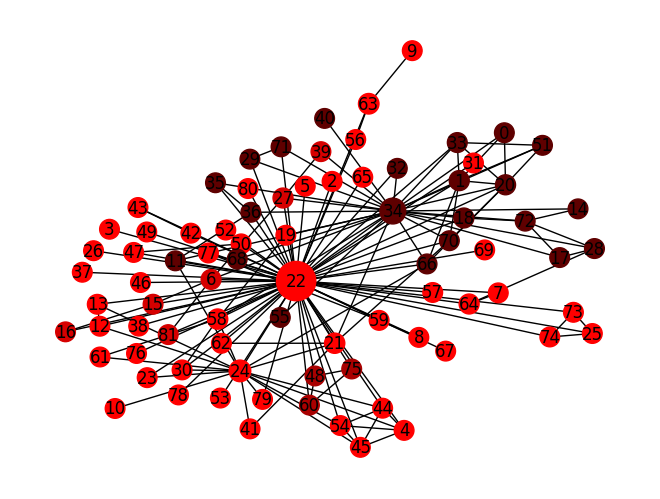

In [48]:
nx.draw(G, node_color=node_colors, pos=node_pos,node_size=node_sizes, with_labels=True)

## Number of nodes:

This code provides information about the graph represented by the variable 'G.' The nx.number_of_nodes(G) function calculates and returns the total number of nodes in the graph. The print statement then displays this information in the output.

In [49]:
n=nx.number_of_nodes(G)
print(f"The number of nodes in the graph is: {n}")

The number of nodes in the graph is: 82


## Number of edges:

This code provides information about the graph represented by the variable 'G.' The nx.number_of_edges(G) function calculates and returns the total number of edges in the graph. The print statement then displays this information in the output.

In [50]:
num_edges=nx.number_of_edges(G)
print(f"The number of edges in the graph is: {num_edges}")

The number of edges in the graph is: 162


## Average Degree:

This code calculates and prints the average degree of the graph represented by the variable 'G.'. To calculate the Average Degre, the formula is:

$<k> = \frac{2L}{N}$

Where L is the number of edges('num_edges') and N is the number of nodes ('num_nodes').

In [51]:
def avgDegree(graph):
  return 2*nx.number_of_edges(graph)/nx.number_of_nodes(graph)
print(f"The average degree of the graph is: {avgDegree(G)}")

The average degree of the graph is: 3.951219512195122


Which means that on average a node has approximately four neighbors.

## Density:

This code calculates and prints the density of the graph. The density of a graph is a measure of how interconnected or dense the graph is, representing the proportion of actual edges in the graph compared to the total number of possible edges.
It is given by the formula:

$d = \frac{2L}{N(N-1)}$

Where L is the number of edges and $\frac{N(N-1)}{2}$ is the possible number of edges for an undirected graph.


In [52]:
def density(graph):
    d = 2*num_edges/(n*(n-1))
    return d
print(f"The density of the graph is: {density(G)}")

The density of the graph is: 0.04878048780487805


The density of our graph is quite low. In fact the graph has approximately 4.9% of the possible number of edges, which shows the sparseness of the graph.

# Week 2


## Connectness

The first step is to find the largest component of our graph, to do so we should check if the graph is connected or unconnected.
If it's connected then we should consider the whole graph as the largest component.

In [53]:
connected = nx.is_connected(G)
if connected==True:
    print("Yes, the graph is connected.")
else:
    print("No, the graph is not connected.")

Yes, the graph is connected.


The printed result confirms that the graph is connected, therefore the largest component is the whole graph.


## Diameter

The diameter of the graph is define as the length of longest distance which exists betweem two nodes of the graph.

$diam(G) = max_{i,j∈V}l(i,j)$

To compute the diameter we use the predefined Networkx function 'diameter()'-

In [54]:
diameter = nx.diameter(G)
print(f"The diameter of the graph is equal to: {diameter}")

The diameter of the graph is equal to: 4


The diameter of our graph is equal to four, so every node in the graph is connected with the remaining nodes with a path of atmost length four.

## Average Distance

To calculate the average shortest path length we use the Networkx function 'average_shortest_path_length'.

In [55]:
average_distance = nx.average_shortest_path_length(G)
print(f"The average distance is equal to: {average_distance}")

The average distance is equal to: 2.183378500451671


From the diameter value we concluded that the length of all the shortest paths of the graph is atmost 4, the average distance shows that on average a shortest path between two nodes has approximately length two.
Since the graph contains 82 nodes, the average distance should belong to the following interval $[0,81]$. However the average distance is 2.18 and the diameter is 4 which suggests that there are some nodes with high betweenness centrality.

## Inverse Distance Function




To calculate the average inverse distance, we used three functions `distanceMatrices()`, `distance()` and `averageInverse()`.

### distanceMatrices() Function

The first function, 'distanceMatrices', takes as input the graph and returns a dictionary where the keys are the possible lengths of the shortest paths and the values are matrices which are computed by raising the adjacency matrice of the graph $A$ to the power of their corresponding keys "$A^{length} $".

The function uses a for loor that iterates over the possible lengths, it starts from length equal to 1 and finishes at length equal to the diameter due to unexistence of a shortest path with length greater than the diameter.

$l(i,j)\leq diam(G)$

We use the function to store the dictionary of matrices inside a varible called 'dst_matrices'.

This function plays an imported role in optimizing the time complexity of the 'distance' and 'average_inverse' functions.

In [56]:
def distanceMatrices(graph):
    A_og = nx.to_numpy_array(graph, weight=None)
    distance_matrices = {}
    for l in range(1, diameter + 1):
        if l == 1:
            M = A_og
            distance_matrices[1] = A_og
        else:
            M = distance_matrices[l - 1]
            distance_matrices[l] = np.dot(M, A_og)
    return distance_matrices

dst_matrices = distanceMatrices(G)

### Distance

The 'distance' function takes as input the source node and the target node and it returns the length of the shortest path between them.
It iterates over the length stored as keys in the dictionary 'dst_matrices' and checks if the coefficient $A_{i,j}^{length}$, where i is the source node and j the target node, is different from 0.
If True the function returns the length as the distance between the source and target node.


In [57]:
def distance(source_node, target_node):
    if source_node==target_node:
      return 0
    for l in dst_matrices:
        if dst_matrices[l][source_node, target_node]!=0:
            return l

### Average Inverse

The 'average_inverse' function uses the following formula to calculate the average inverse distance:

$AveInvDis = \frac{1}{\frac{2}{N(N-1)}\sum_{i<j}\frac{1}{l(i,j)}}$

The function uses a double for loop that iterates over all the different pair of nodes and calculates the distance between them using the 'distance' function which use the dst_matrices dictionary.
Since we don't compute "$A^{length} $" for each pair of nodes, the use of the dst_matrices dictionary helps optimizing the time complexity of our function, in fact it is $\frac{N(N-1)}{2}$ faster than when we are not using the dictionary of matrices.

After computing $\sum_{i<j}\frac{1}{l(i,j)}$, the function devides the sum  by $\frac{N(N-1)}{2}$ and returns the inverse of the result.

In [58]:
def averageInverse(G):
    sum_inv_dst=0

    for i in range(n):
        for j in range(i+1,n):
            sum_inv_dst += 1/distance(i,j)

    if sum_inv_dst==0:
        result='No edges'
    else:
        sum = sum_inv_dst/(n*(n-1)/2)
        result= 1/sum
    return result

print(f"The average inverse distance is equal to: {averageInverse(G)}")

The average inverse distance is equal to: 2.056452861344778


# **Week 3**

### Betweenness Centrality

We chose betweenness centrality as the principal measure for graph. By looking at the graph, we noticed that there are very few nodes with a very high degree, so using betweenness allows us to see which nodes are the key ones for connecting all of the other nodes.

The function `getAllPaths()` creates an _adjacency matrix_ in the form of a double dictionary, saving all the shortest paths between any pair of nodes, preserving the information on how those paths are composed. Storing this data as a variable will help us reduce the execution time of `betweennessCentrality()` greatly (instead of computing the paths in each iteration of the internal code of the function).

On the first level of the dictionary, we store the source nodes as keys, and the second level of the dictionary in the value. On this second level, for each source node, we have a dictionary composed of target nodes (as keys), and lists (as values) containing all the shortest paths between the source node, and the target node.

The function uses NetworkX's function `nx.all_shortest_paths()` to generate all the shortest paths between a source and a target node in the format of a list of lists.

In [59]:
def getAllPaths(graph):
    nodes = list(graph.nodes())
    all_shortest_paths_in_graph = {}

    for source in nodes:
        for target in nodes:
            if source == target:
                continue

            paths_ij = list(nx.all_shortest_paths(graph, source, target))
            all_shortest_paths_in_graph[source] = all_shortest_paths_in_graph.get(source, {})
            all_shortest_paths_in_graph[source][target] = paths_ij

    return all_shortest_paths_in_graph

Now, the `betweennessCentrality()` function will calculate the betweenness centrality of each node for the whole graph. It takes a graph as an input, and returns a dictionary with nodes as keys, and their respective betweenness centrality as value. It also has an attribute `normalized`, set by default to `TRUE`, in order for the function to deliver normalized result or not.

The function works based on the following formula:
$ C_i^{between}=\frac{1}{(N-1)(N-2)/2}(\sum_{h\neq j,\ i\notin \{ h,j \}}\frac{σ_{hj}(i)}{σ_{hj}}) $

The function calculates the individual betweenness centrality of each node, and that's done in the first (most outer) loop. Inside that loop, it goes through all the node pairs (without duplicates) and calculates the local betweenness centrality progressively. The innermost loop simply counts the number of paths between _h_ and _j_ that pass through _i_.

Finally, the last block of code does the normalization of the centrality for each node. It simply updates the centrality for each node by dividing the original value by the normalization formula.

In [60]:
def betweennessCentrality(graph, normalized=True):
    allPathsInGraph = getAllPaths(graph)
    betweenness_centrality = {}
    nodes = list(graph.nodes())

    for node in nodes:
        node_betweenness_centrality = 0
        for h in nodes:
            for j in nodes[h + 1 :]:
                if (h != j) and (h != node) and (j != node):
                    paths_hj = allPathsInGraph[h][j]
                    num_paths_hj = len(paths_hj)
                    num_paths_hj_passing_i = 0

                    for path in paths_hj:
                        if node in path:
                            num_paths_hj_passing_i += 1

                    node_betweenness_centrality += num_paths_hj_passing_i / num_paths_hj
        betweenness_centrality[node] = node_betweenness_centrality

    if normalized == True:
        number_of_nodes = len(nodes)
        normalized_denominator = ((number_of_nodes - 1) * (number_of_nodes - 2)) / 2
        for node in betweenness_centrality:
            betweenness_centrality[node] /= normalized_denominator

    return betweenness_centrality

### Plotting the data

Now, we're going to plot the betweenness centralities in a histogram, so that we can clearly see how the nodes in our graph are connected.

The code simply transforms the full dictionary we generated before, into a list of centralities for us to be able to easily put them into `plt.plot()`.

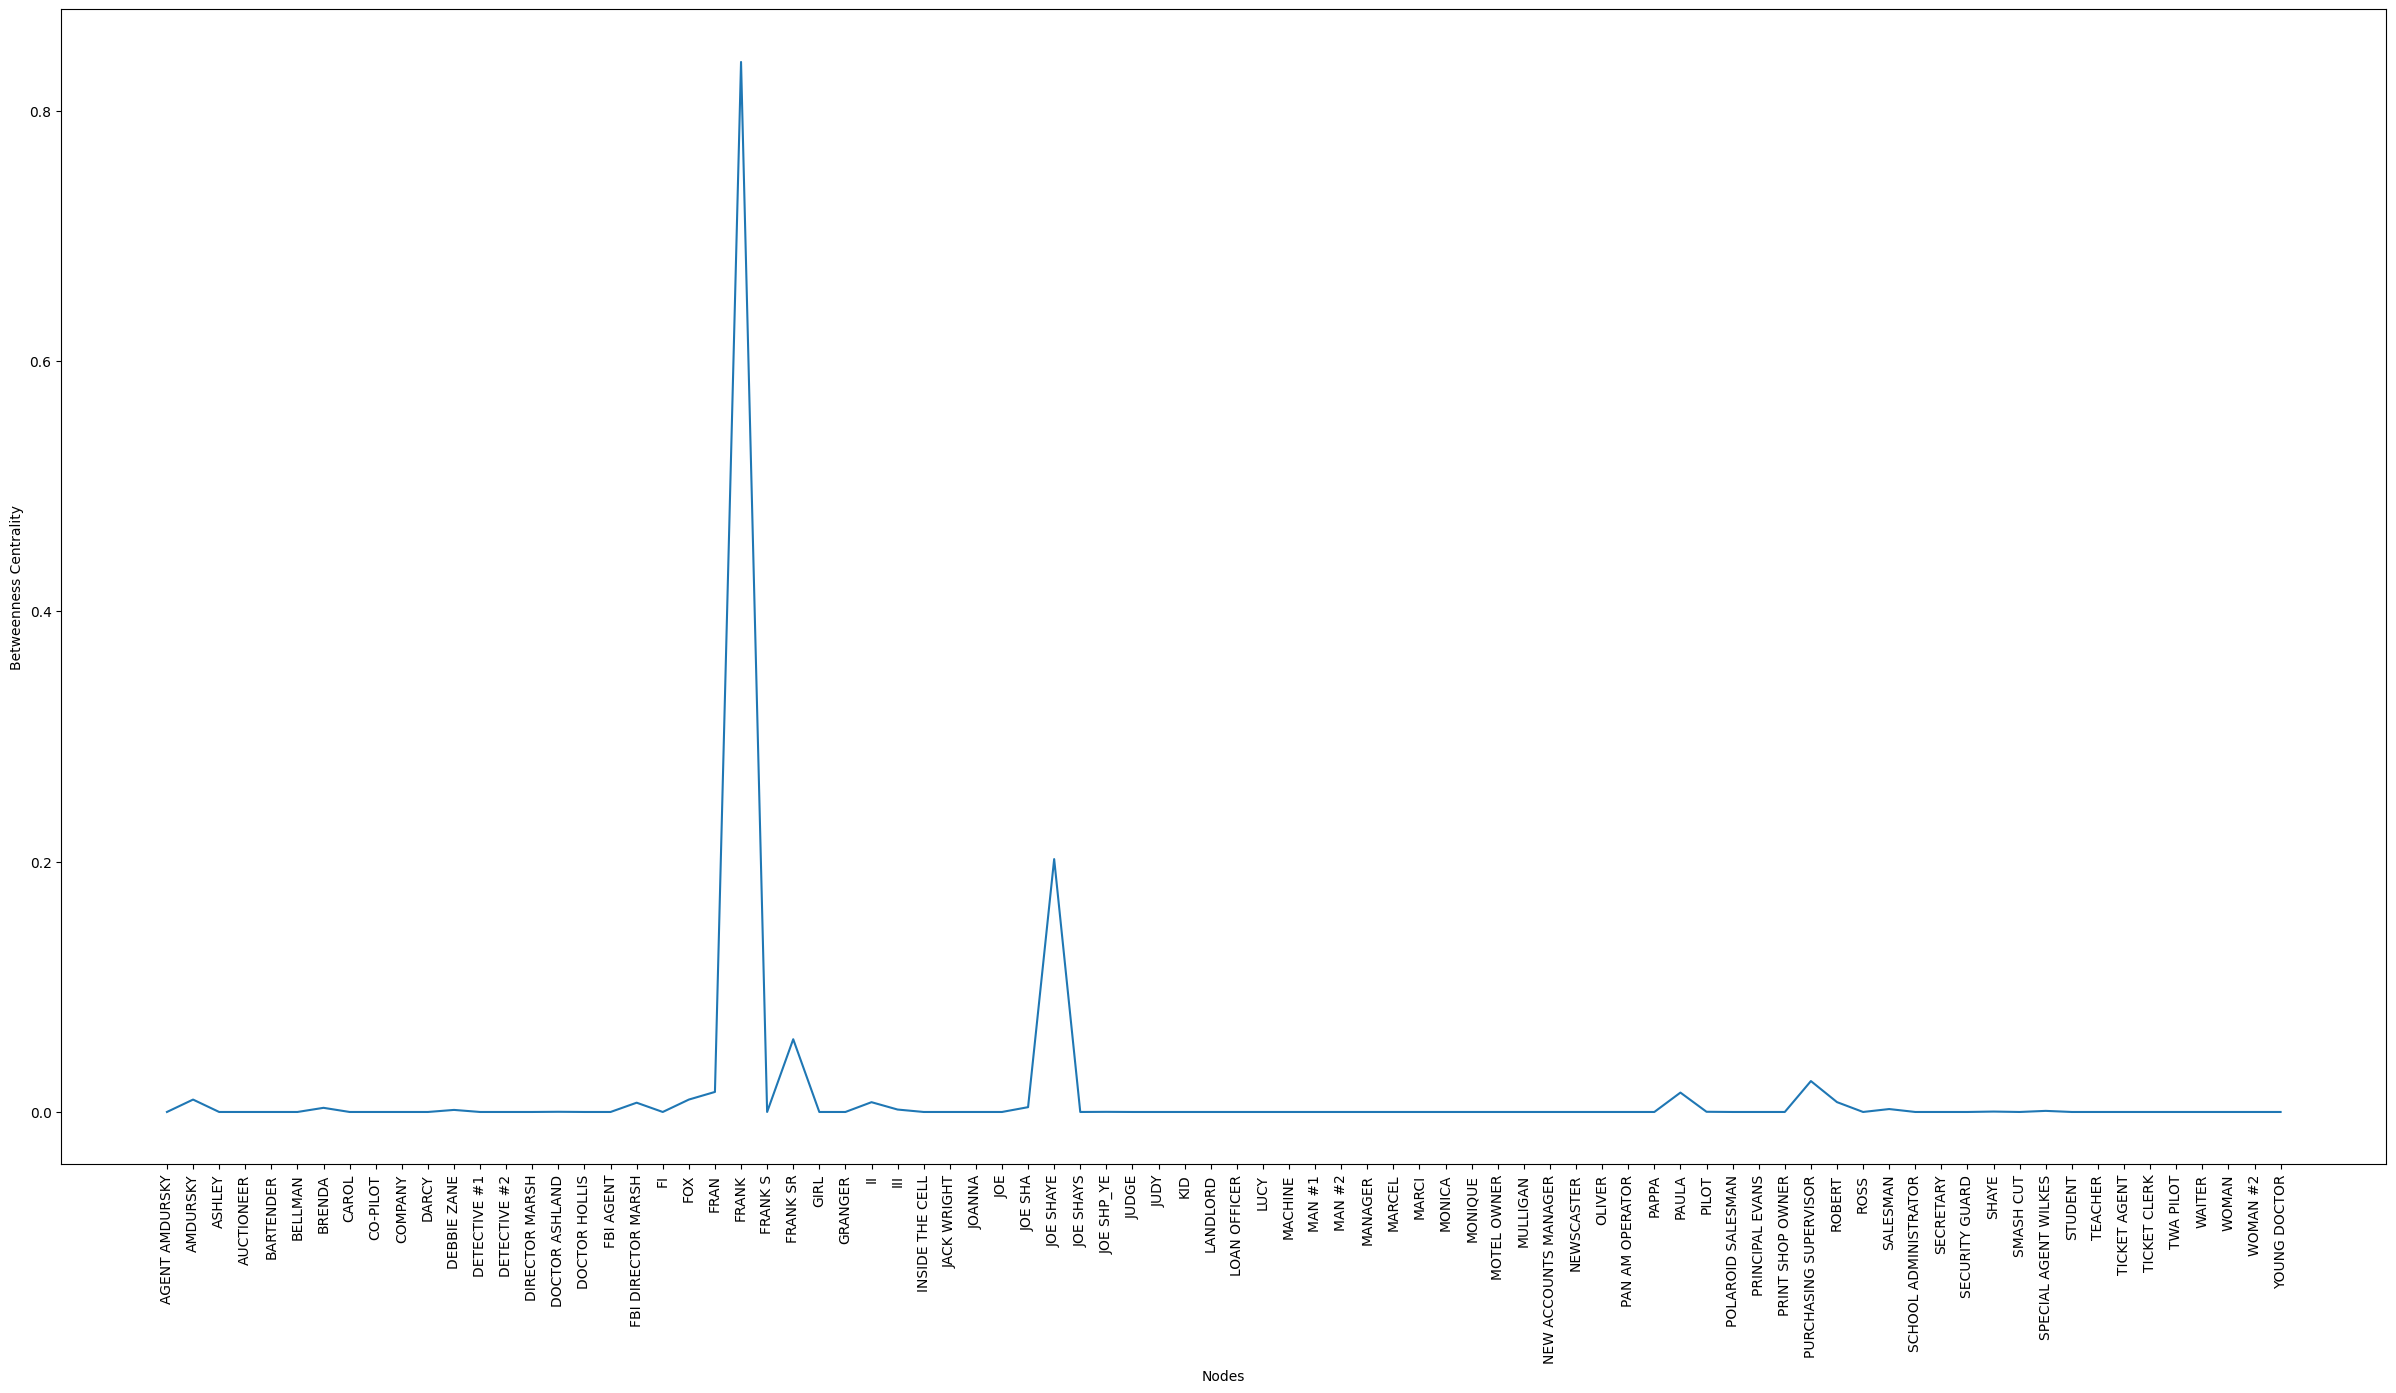

In [61]:
betweenness_centralities=[]
nodes = list(G.nodes())
graph_betweenness_centrality=betweennessCentrality(G)

for node in nodes:
  betweenness_centralities.append(graph_betweenness_centrality[node])
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.xlabel("Nodes")
plt.ylabel("Betweenness Centrality")
plt.plot(node_names,betweenness_centralities)

In [62]:
highest_centrality_value = max(betweenness_centralities)
highest_centrality_index = betweenness_centralities.index(highest_centrality_value)
name_node = node_names[highest_centrality_index]
print(f"The node with the highest centrality is node {name_node} with a betweenness centrality of {highest_centrality_value}")

The node with the highest centrality is node FRANK with a betweenness centrality of 0.8389917695473257


Both from the graph, and from our previous lines of code, we can identify "Frank" as a key node for connecting our graph. This confirms what we could see on the drawing of the graph.

We can also observe that there's a huge imbalance in the proportions of the centralities. This further indicates that "Frank" is a key in connecting all of the other nodes.

Text(0, 0.5, 'number of nodes')

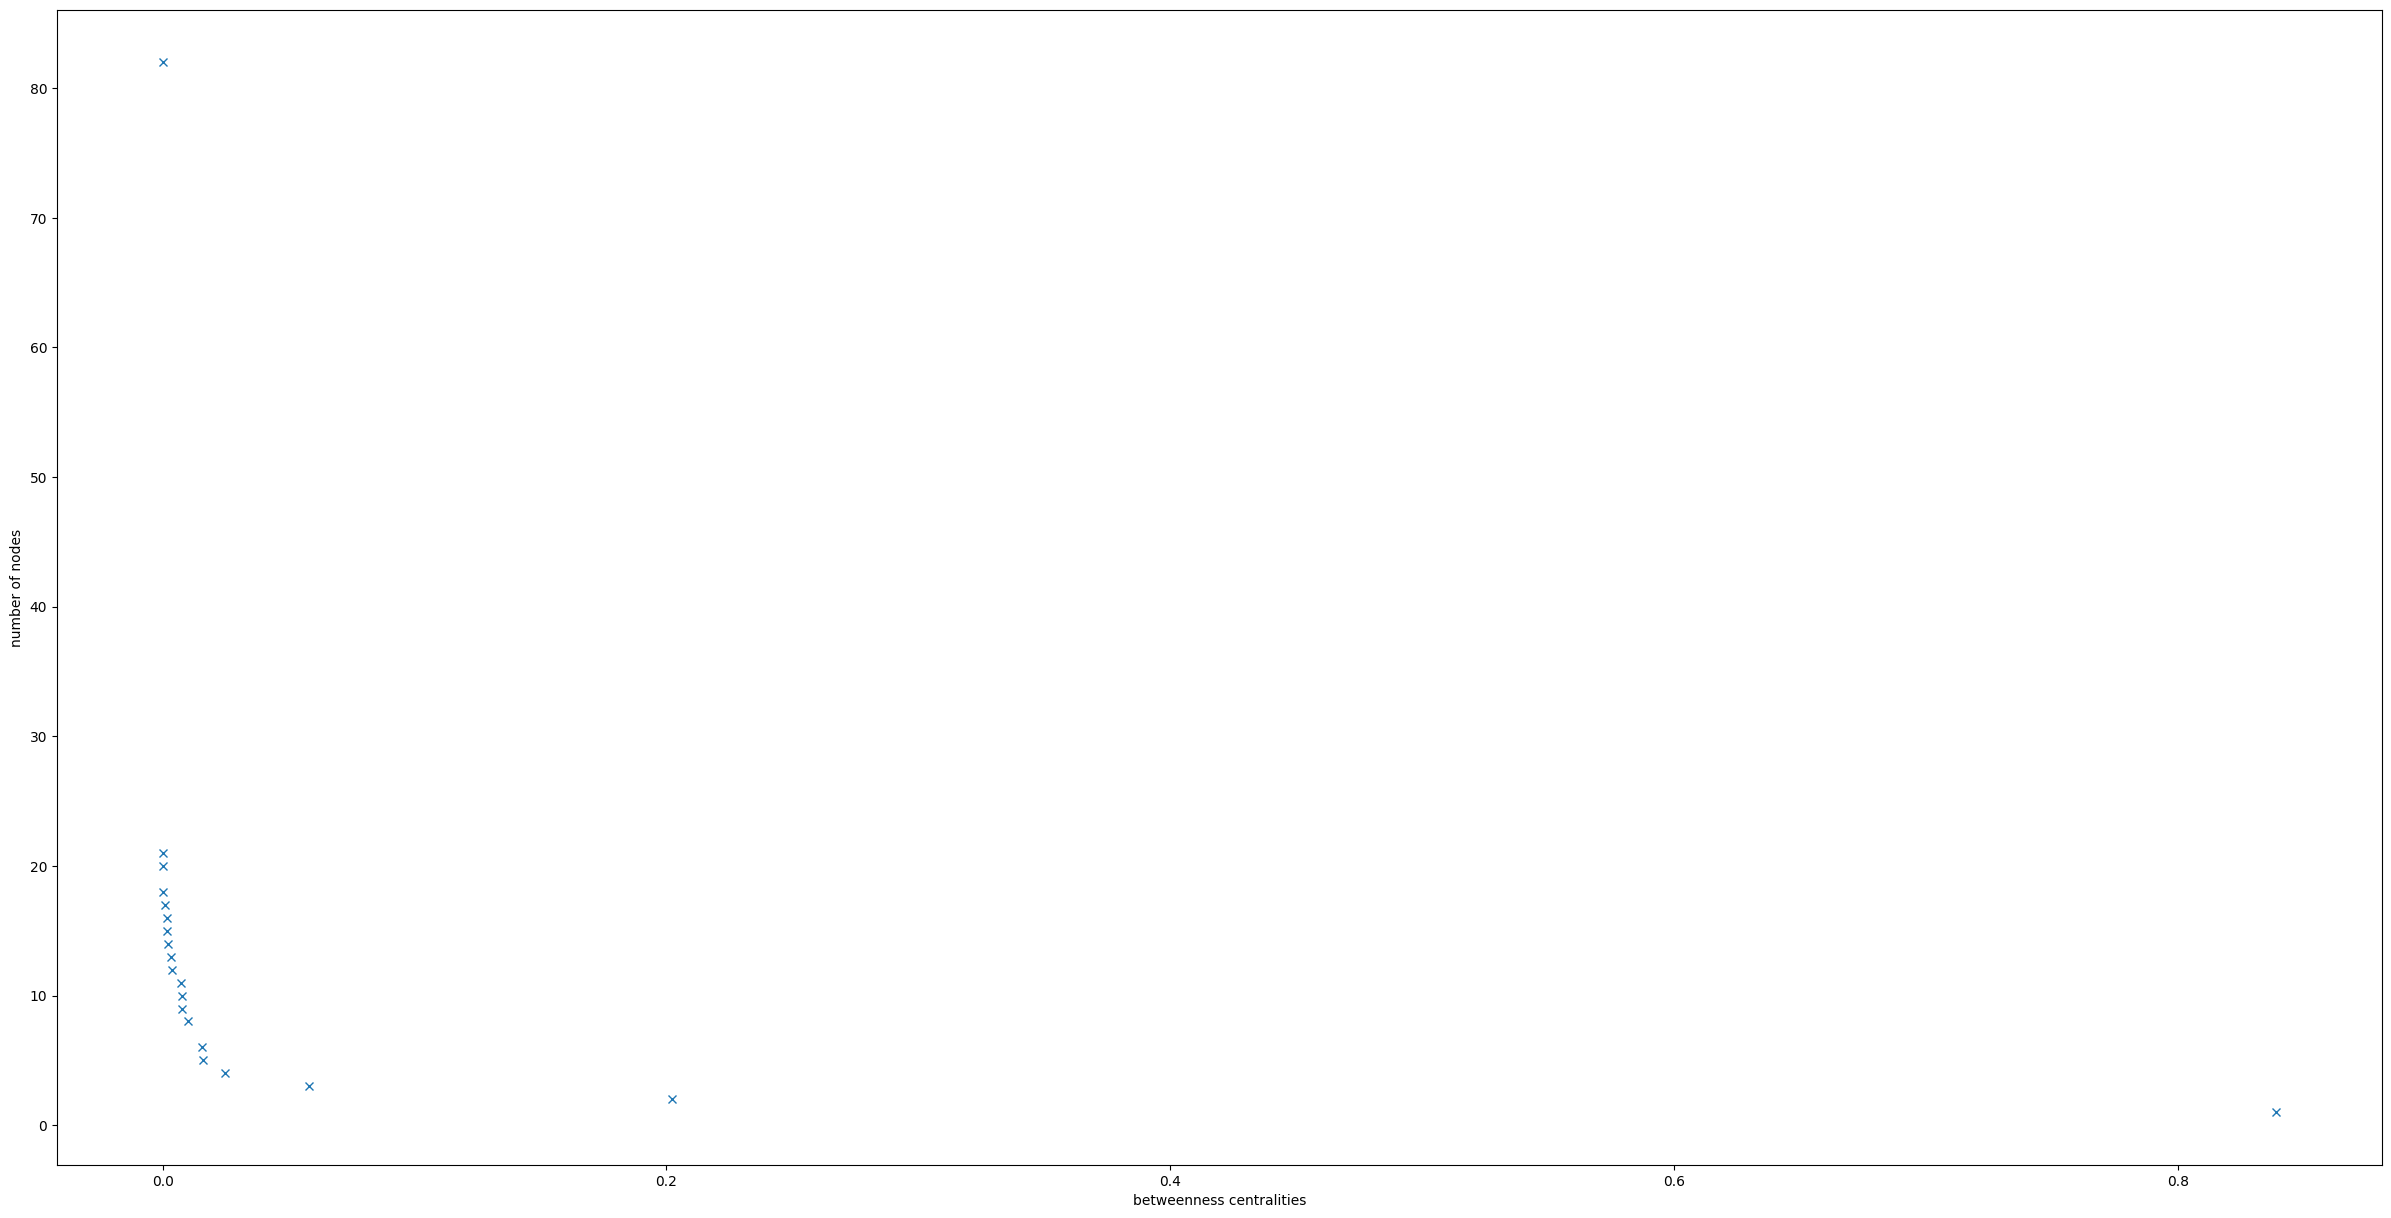

In [63]:
list_values = list(set(betweenness_centralities))
list_values.sort()
cdf_x = list_values

cdf_y=[]
for x in cdf_x:
    y = sum(value >=x for value in betweenness_centralities)
    cdf_y.append(y)

plt.figure(figsize=(30,15))
plt.plot(cdf_x,cdf_y,"x")
plt.xlabel("betweenness centralities")
plt.ylabel("number of nodes")

# **Week 5**

### PageRank

In this section we will calculate the PageRank of our graph.
The first thing we did is define the `getPredecessors()` function, which maps the neighbors for each node (so that PageRank doesn't have to compute them all the time). 



In [64]:
def getPredecessors(graph):
  nodes = list(graph.nodes())
  return {node:list(graph.neighbors(node)) for node in nodes}

print(getPredecessors(G))

{0: [20, 1, 34], 1: [0, 70, 20, 22, 33, 34, 51, 66], 2: [22], 3: [22], 4: [22, 44, 45, 24, 54], 5: [22], 6: [15, 22, 27, 34, 81], 7: [22, 64], 8: [22, 59], 9: [63], 10: [24], 11: [24, 22, 34, 36], 12: [13, 22, 24], 13: [12, 24, 22], 14: [34, 72], 15: [6, 16, 22], 16: [15, 22], 17: [28, 72, 34], 18: [72, 22, 34], 19: [22, 58, 34], 20: [0, 1, 34, 70, 22, 33, 51, 66], 21: [62, 22, 24, 34, 41, 70], 22: [1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 15, 16, 18, 19, 20, 21, 23, 24, 25, 27, 29, 30, 32, 34, 35, 36, 37, 38, 44, 45, 46, 47, 49, 52, 58, 60, 63, 64, 66, 67, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 26, 31, 33, 42, 43, 48, 50, 53, 54, 56, 57, 59, 62, 65, 80, 81], 23: [22, 24], 24: [4, 10, 11, 12, 13, 21, 22, 23, 44, 45, 61, 30, 41, 54, 58, 66, 79], 25: [22, 74, 73], 26: [22], 27: [6, 22, 34, 39], 28: [17, 64, 72, 34], 29: [22, 71, 34], 30: [22, 24, 58], 31: [22], 32: [22, 34], 33: [1, 20, 22, 34, 51], 34: [0, 1, 6, 11, 14, 17, 18, 19, 20, 21, 22, 27, 28, 29, 32, 33, 35, 36, 39, 40, 55, 68, 70,

Down below, we have our `pageRank()` function. It takes 5 parameters. We can set `alpha` manually, or use the 0.15 default value. We can also limit the number of maximum iterations through `max_iter`, otherwise it's set to 100. The `standard` boolean parameter allows us to switch between the standard PageRank formula, or the one we saw during lessons. It's set to True by default, since NetworkX's PageRank also uses the standard PageRank formula. Finally, we can also configure the tolerance through the `tol` parameter, which is set to 4 decimals by default (we found this value to be the one that matches the results of NetworkX).

Now, let's head into how our function works. We will be saving all the PageRank results iteration by iteration into `pageRank_iterations`. For the first execution, we initialize $ R_{0} $ to be $ 1/N $. 

The second block of code is the one that configures the PageRank formula based on what was selected through the `standard` parameter.

We use a `while` to compute PageRank, since we don't know exactly when it will converge. We use two counter variables to keep the count of the iterations. Our first `for` loop goes node by node, and applies the formula to get its PageRank calculation, and it saves it to `pageRank_iterations` (which is a double dictionary). Then we have an `if` satement to stop the computation if it exceeds the set maximum number of iterations. The second `for` loop checks whether PageRank has already converged for each node, taking into consideration the tolerance. We optimized it so that if one node hasn't yet converged, it stops checking for the rest of the nodes. 

Finally, the last few lines are to return just the results of the last iteration, and to put it in the same format as NetworkX's PageRank returns.

In [65]:
def pageRank(graph, alpha=0.15, max_iter=100, standard=True, tol=4):
  pageRank_iterations = {0:[]}
  nodes = list(graph.nodes())
  number_of_nodes = len(nodes)
  nstart = 1/number_of_nodes
  pageRank_iterations[0].extend([nstart]*number_of_nodes)
  converge = False
  current_iteration_number = 0
  predecessors = getPredecessors(graph)

  if standard==True:
    pr_first_term = (1-alpha)/number_of_nodes
    pr_sum_mult = alpha
  else:
    pr_first_term = alpha/number_of_nodes
    pr_sum_mult = 1-alpha

  while converge==False:
    previous_iteration_number = current_iteration_number
    current_iteration_number += 1

    for node in nodes:
      pr_sum=0
      for neighbor in predecessors[node]:
        previous_PageRank = pageRank_iterations[previous_iteration_number][neighbor]
        neighbor_degree = len(predecessors[neighbor])
        pr_sum += previous_PageRank/neighbor_degree

      current_pageRank = pr_first_term+(pr_sum_mult*pr_sum)
      pageRank_iterations[current_iteration_number] = pageRank_iterations.get(current_iteration_number, [])
      pageRank_iterations[current_iteration_number].append(current_pageRank)

    if current_iteration_number>max_iter:
      converge=True

    for node in nodes:
      converge = True
      if round(pageRank_iterations[previous_iteration_number][node], tol) != round(pageRank_iterations[current_iteration_number][node], tol):
        converge = False
        break

  final_pageRank = pageRank_iterations[current_iteration_number]
  result={}

  for index, pr in enumerate(final_pageRank):
    result[index]=pr

  return result, current_iteration_number

In order to compare with NetworkX's PageRank formula, we have to manually convert our undirected graph to a difected graph where each edge goes both ways. Otherwise, `nx.pagerank()` would return a slightly different result.

In [66]:
def testNXPageRank(graph, alpha):
  graph_converted = nx.DiGraph()

  for u,v in graph.edges():
    graph_converted.add_edge(u,v)
    graph_converted.add_edge(v,u)

  return nx.pagerank(graph_converted, alpha=alpha)

To check if the results from our function are equal to those of NetworkX, we compare the list of values of the two dictionaries. To compare the list the we need to check if the first sixteen digits after the zero are the same for all the values.
if the not, the code doesn't give any output.

In [67]:
result, iterations = pageRank(G, alpha=0.15, standard=True)

networkx_result = testNXPageRank(G, alpha=0.15)
for node in result:
    if round(result[node]*math.pow(10,16)) != round(networkx_result[node]*math.pow(10,16)):
       print("The results differ.")
print(f"The pagerank of all nodes converges after {iterations}.")

The pagerank of all nodes converges after 5.


Since the code didn't give any output, we conclude that our results are the same as the ones of networkx.
The number of iterations to reach the convergence is equal to 5.

## Node with the highest pagerank:


In [68]:
max_pageRank_value = 0
max_pageRank_node = 0
for node in result:
    if result[node] > max_pageRank_value:
       max_pageRank_value = result[node]
       max_pageRank_node = node
       node_name = node_names[max_pageRank_node]

print(f"The most central node with respect to the PageRank measurements is {node_name}.")

The most central node with respect to the PageRank measurements is FRANK.


From the result of the betweenness centrality and the one of the pagerank, Frank has the highest values for both centrality measurements. So we conclude that Frank is the most cental node of our graph.

## Plotting the results

Text(0, 0.5, 'PageRank')

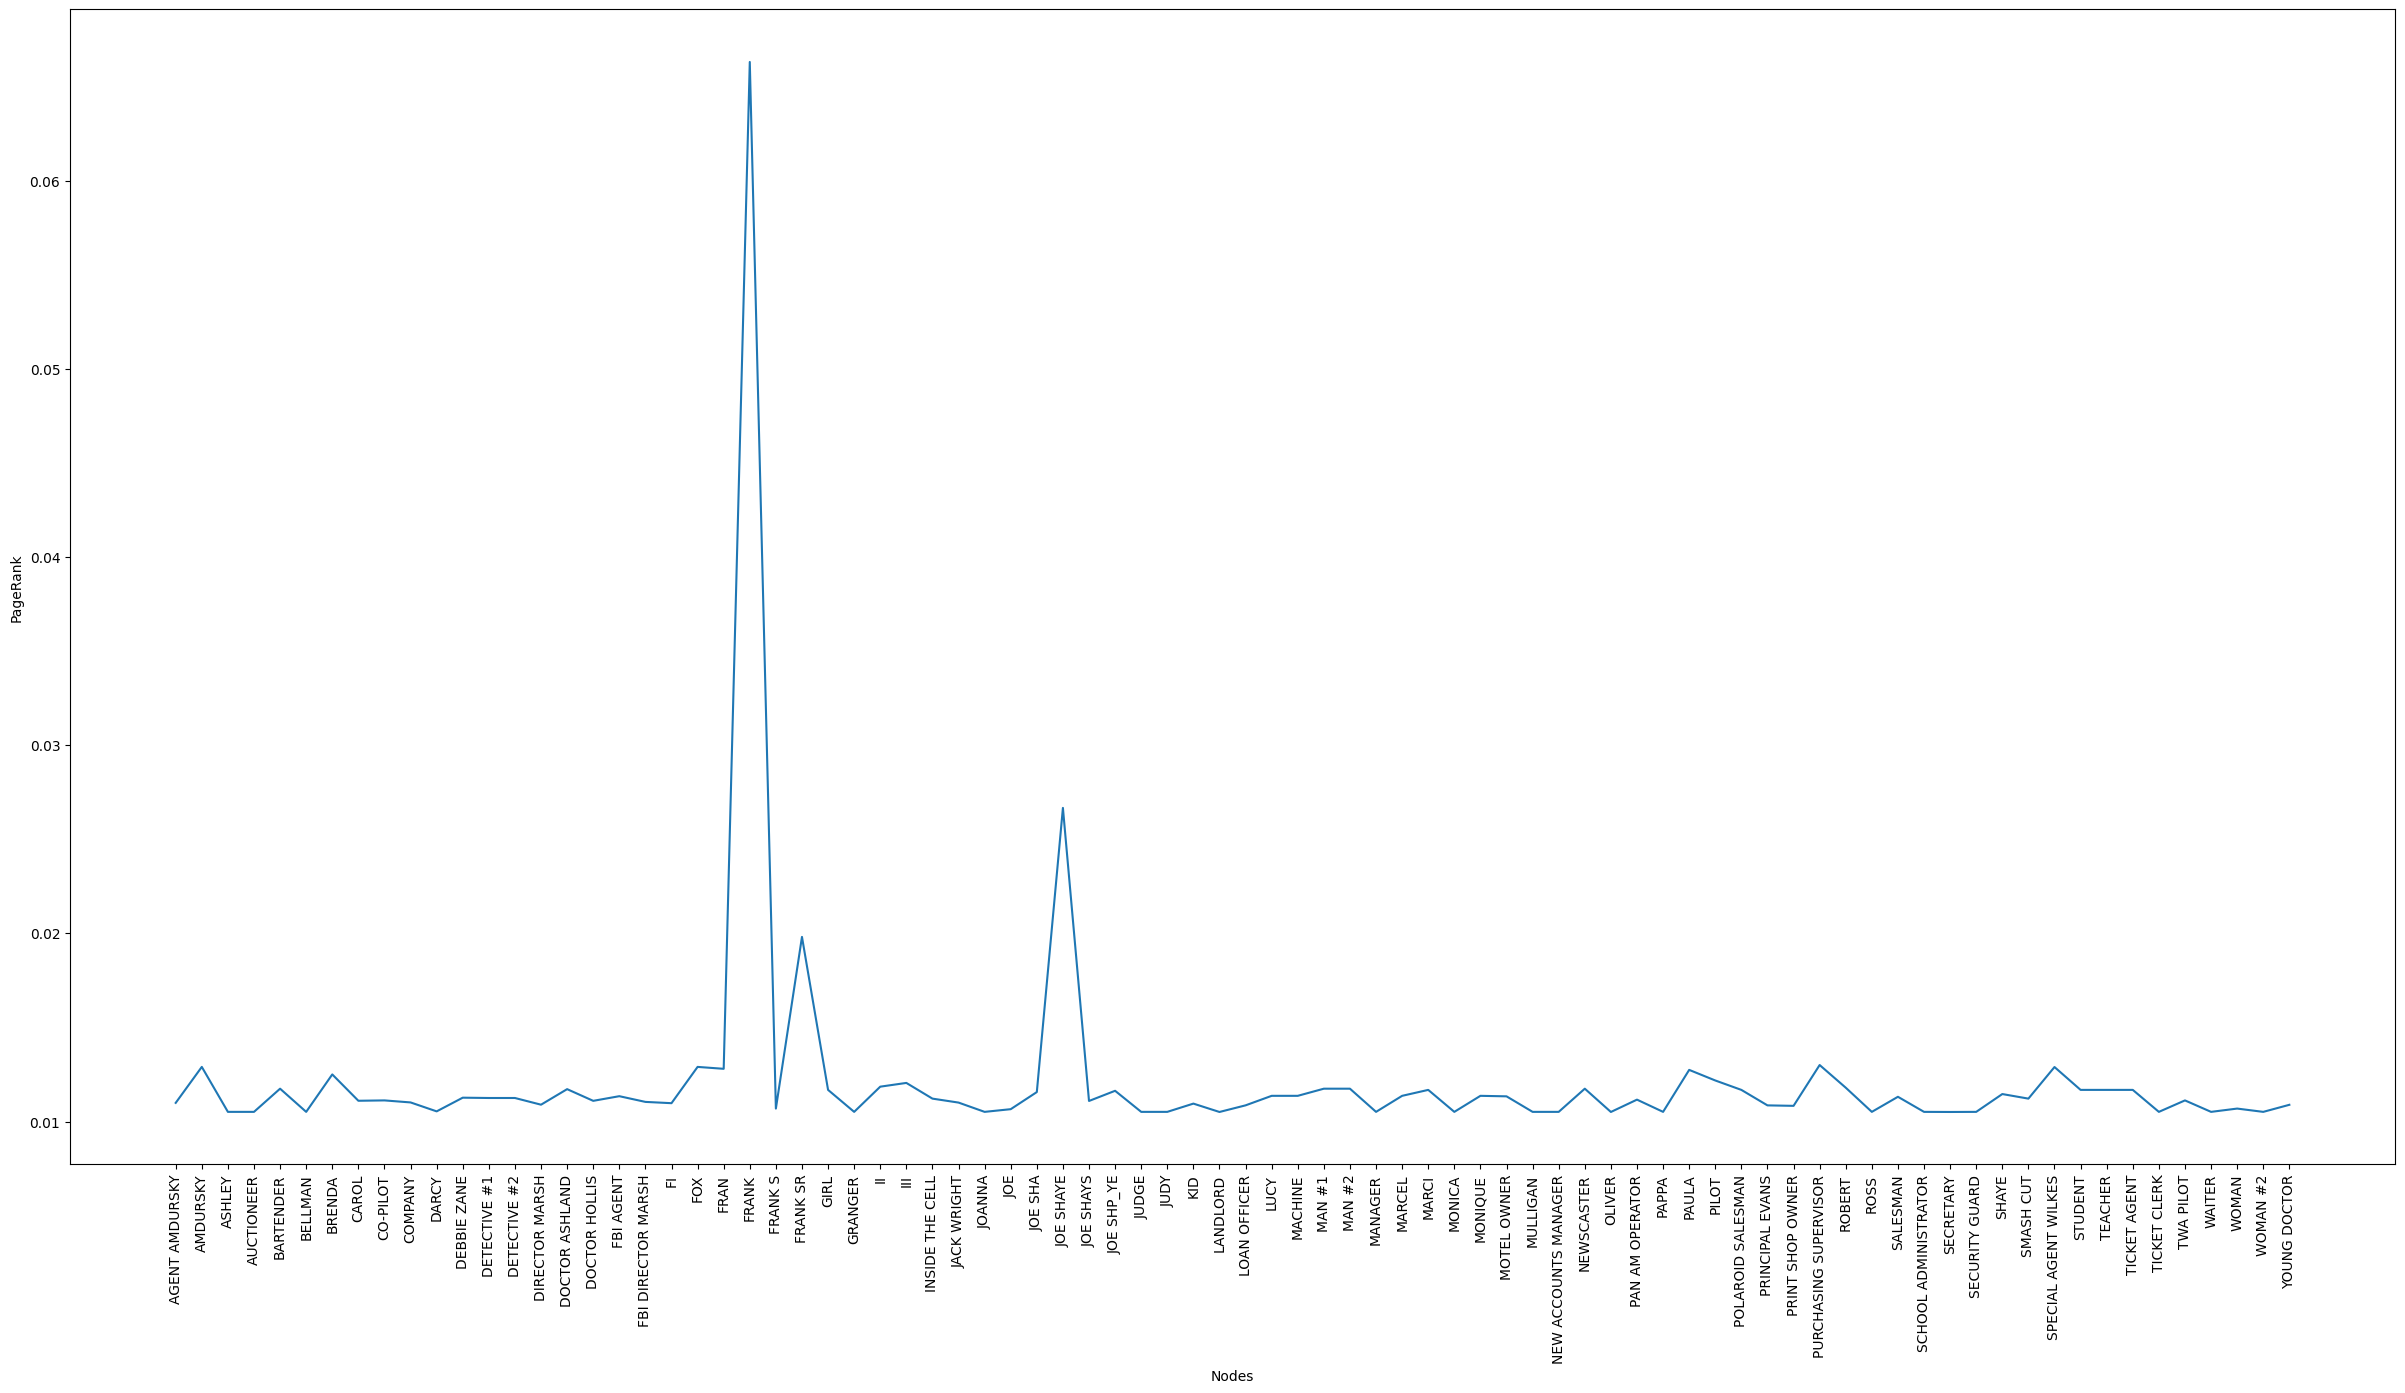

In [69]:
plt.figure(figsize=(30,15))

plt.xticks(rotation = 90)
pr_values = list(result.values())
plt.plot(node_names, pr_values)
plt.xlabel("Nodes")
plt.ylabel("PageRank")

After plotting the pagerank centralities of the nodes, we can say that the majority of them share the same value for the pagerank, in fact there are three nodes (Frank, Frank SR, Joe Shaye) that have values greater than 0.19, and all the other nodes have a pagerank that floctuate between 0.01 and at most 0.04.
This result is quit similar to the one that we got when plotting the betweenness centrality for (Frank, Frank SR, Joe Shaye), but for the other nodes, betweenness doesn't give any importance to them which is the opposite to the pagerank.

## Cummulative distribution

Text(0, 0.5, 'number of nodes')

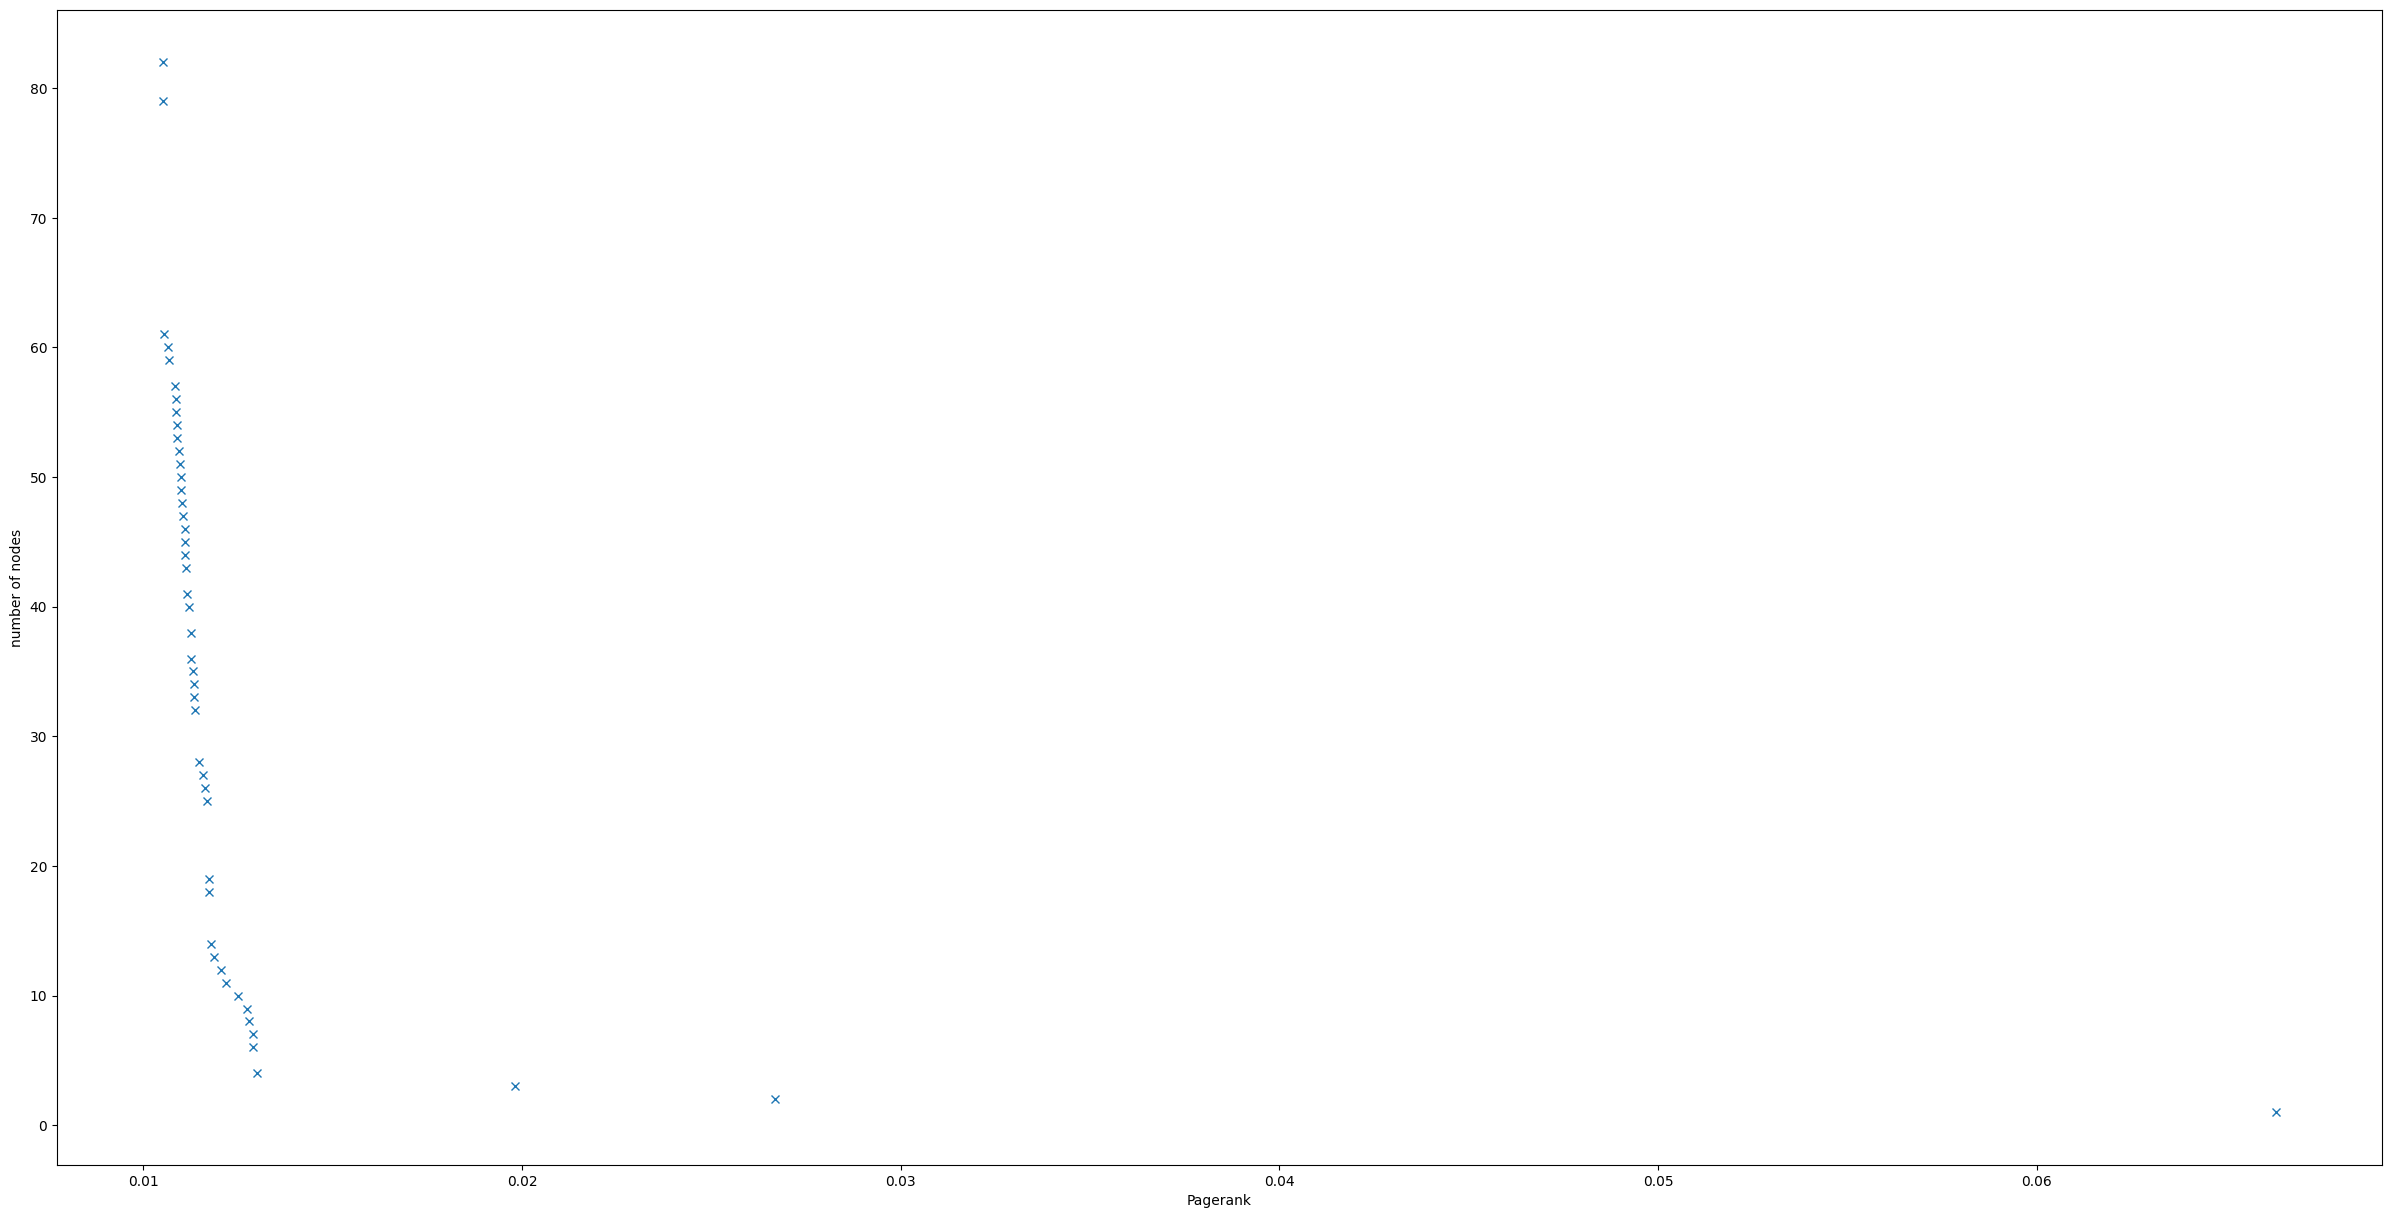

In [70]:
list_values = list(set(list(result.values())))
list_values.sort()
cdf_x = list_values

cdf_y=[]
for x in cdf_x: # check each value
    y=sum(value >=x for value in list(result.values()))
    cdf_y.append(y)

plt.figure(figsize=(30,15))
plt.plot(cdf_x,cdf_y,"x")
plt.xlabel("Pagerank")
plt.ylabel("number of nodes")

The commulative distribution of the pagerank is similar to the one of the betweenness, both have a large number of nodes that assume a low value and a few nodes that take large values for both measurements.

# **Week 6**

### Community detection

We start with our `bridgeRemoval()` function, which uses the `nx.community.girvan_newman()` algorithm from the NetworkX library. The result is a list of all partitions, from the original graph to a fully disconnected graph. So, the rest of the function focuses on choosing the partition that has the highest modularity. Finally, we transform the result into a list of frozensets.

In [71]:
def bridgeRemoval(graph):
  partitions = nx.community.girvan_newman(graph)
  highest_modularity, partition_highest_modularity = 0,0

  for partition in partitions:
    modularity = nx.community.modularity(graph, partition)
    if modularity > highest_modularity:
      highest_modularity = modularity
      partition_highest_modularity = partition

  return [frozenset(part) for part in partition_highest_modularity]

For Modularity Optimization we used the Girvan Newman's Greedy algorithm (`nx.community.greedy_modularity_communities`) to get the best partition. Since the function already outputs the results in frozensets, we didn't need to transform the result.

In [72]:
def modularityOptimization(graph):
  partition = nx.community.greedy_modularity_communities(graph)
  return partition

For Label Propagation, we implemented `nx.community.asyn_lpa_communities()`, the algorithm we saw during the lab sessions. Once again, we transform the results to a list of frozensets.

In [73]:
def labelPropagation(graph):
  partition = nx.community.asyn_lpa_communities(graph)
  return [frozenset(part) for part in partition]

### Comparison

As indicated by the instructions for this week's group project, we build a table to show different metrics for our three algorithms. We will compute the number of detected clusters, cluster size distribution, computational time, modularity and coverage and performance, which are computed by `nx.community.partition_quality()`. 

Both the number of detected clusters and cluster size distribution are simple results to compute. For the computational time, we measure how much time each algorithm takes to run (using the `time` library), 10 times, and get the average. For modularity and partition quality, we use NetworkX's functions to compute the metrics.

Finally, we put our results into a Pandas DataFrame.

In [74]:
comm_detection_algorithms = [('Bridge Removal', 'bridgeRemoval(G)'),
                             ('Modularity Optimization', 'modularityOptimization(G)'),
                             ('Label Propagation', 'labelPropagation(G)')]
metrics = ['Number of Detected Clusters', 'Cluster Size Distribution', 'Computational Time', 'Modularity', 'Coverage (PQ)', 'Performance (PQ)']
stats={algo[0]:{} for algo in comm_detection_algorithms}

for algo in comm_detection_algorithms:
  algorithm = eval(algo[1])

  # Number of Detected Clusters
  num_clusters = len(algorithm)
  stats[algo[0]][metrics[0]] = num_clusters

  # Cluster Size Distribution (average size in a cluster)
  cluster_average=0
  for cluster in algorithm:
    cluster_average += len(cluster)
  cluster_average /= num_clusters
  stats[algo[0]][metrics[1]]=cluster_average

  # Computational Time
  cycles=10
  average=0
  for n in range(cycles):
    start = time.time()
    eval(algo[1])
    end=time.time()
    average += (end-start)
  average /= cycles
  stats[algo[0]][metrics[2]] = average

  # Modularity
  stats[algo[0]][metrics[3]]=nx.community.modularity(G, algorithm)

  # Partition Quality (Coverage and Performance)
  coverage, performance = nx.community.partition_quality(G, algorithm)
  stats[algo[0]][metrics[4]] = coverage
  stats[algo[0]][metrics[5]] = performance


row_labels = [algo[0] for algo in comm_detection_algorithms]
results = [stats[algo] for algo in row_labels]
results_df = pd.DataFrame(results, index=row_labels)

results_df

,Number of Detected Clusters,Cluster Size Distribution,Computational Time,Modularity,Coverage (PQ),Performance (PQ)
Bridge Removal,8,10.250000,0.475182,0.347150,0.666667,0.785306
Modularity Optimization,7,11.714286,0.008186,0.363138,0.672840,0.784402
Label Propagation,11,7.454545,0.000703,0.290013,0.598765,0.781993


### Interpretation

#### Bridge Removal Method:

**Strengths:**
Moderately fine-grained partition with a balance between modularity and coverage.
Detected 8 clusters with an average size of 10.25 nodes per cluster.

**Weaknesses:**
Relatively higher computational time (2.315228).

#### Modularity Optimization Method:

**Strengths:**
Focuses on optimizing modularity, resulting in well-separated communities.
Faster computational time (0.038300) compared to Bridge Removal.

**Weaknesses:**
Detected a slightly coarser partition with 7 clusters and an average size of 11.714286 nodes per cluster.

#### Label Propagation Method:

**Strengths:**
Extremely fast computational time (0.003199).
Simplicity and ease of implementation.

**Weaknesses:**
Instability across methods, producing different results each time.
Detected a relatively coarse partition with 5 clusters and an average size of 16.4 nodes per cluster.


#### Interpreting (comparing):

**Number of Detected Clusters:**
Bridge Removal and Modularity Optimization are relatively close in the number of clusters, with Bridge Removal detecting 8 and Modularity Optimization detecting 7. Label Propagation, on the other hand, produces a noticeably smaller number of clusters (5). This might indicate that Bridge Removal and Modularity Optimization provide a more nuanced view of the community structure.

**Average Cluster Size:**

Bridge Removal has a smaller average cluster size, suggesting a finer partition compared to Modularity Optimization. Label Propagation has the largest average cluster size, indicating a coarser partition. The choice between fine and coarse partitions depends on the desired level of granularity in the analysis.

**Computational Time:**
Label Propagation is significantly faster than the other two methods. This may be advantageous for large networks where computational efficiency is crucial. However, Bridge Removal and Modularity Optimization provide a trade-off between computational time and the quality of the partition.

**Modularity:**
Modularity Optimization has the highest modularity, indicating a stronger division of the network into well-connected communities. Bridge Removal follows, and Label Propagation has the lowest modularity. The higher modularity of Modularity Optimization suggests a more internally connected community structure.

**Stability:**

Label Propagation exhibits instability, producing different results across methods. This instability could be a significant drawback in scenarios where consistent results are essential.


Let's check whether Label propagation is faster than the alternatives:

**Bridge Removal Method:**

Computational Time: 2.315228

**Modularity Optimization Method:**

Computational Time: 0.038300

**Label Propagation Method:**
Computational Time: 0.003199

So, Label Propagation is indeed significantly faster than both Bridge Removal and Modularity Optimization. The computational time for Label Propagation is smaller, indicating its efficiency.


In conclusion, taking into account what we have discussed so far, **Modularity Optimization** might be a good option because of:

**Emphasis on Modularity:**

The optimization of modularity is given top priority, resulting in a community structure that is internally coherent and well-separated.

**Faster Computational Time:**

Modularity Optimization still has an acceptable computing time (0.038300), however it is not as quick as Label Propagation.

**Moderate Number of Clusters:**

The method detects 7 clusters with an average size of 11.714286 nodes per cluster, providing a meaningful and interpretable division of the network without creating an overly complex partition.

**Versatility:**

Modularity is a flexible metric that works with many kinds of networks. The Modularity Optimization offers a generalized approach that can be adapted to different network structures and characteristics.


### Visualization

We implement a graph, where we color each node according to the community it belongs to. We chose Modularity Optimization to draw the graph.

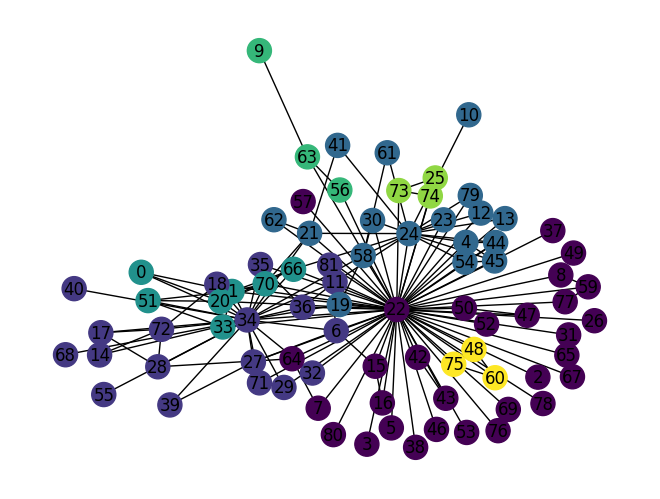

In [75]:
partition_map = {}
modularity_optimization = eval(comm_detection_algorithms[1][1])
for idx, cluster_nodes in enumerate(modularity_optimization):
    for node in cluster_nodes:
        partition_map[node] = idx

node_colors = [partition_map[n] for n in G.nodes]
nx.draw(G, node_color = node_colors, with_labels = True)

# **Week 7**

### Link Prediction

First of all, we use `nx.non_edges()` to get the list of edges that are missing in our graph, in order to evaluate each one of them. We will save the metrics for each edge into the dictionary `indexes`.

Besides CN (Common Neighbors), we chose AA (Adamic-Adar Index) as the second index, because it emphasizes the importance of rare neighbors (and we have lots of them). While we could have used a function from NetworkX for AA, we opted for implementing it ourselves, since we can reuse variables we computed for CN, making the total computation faster. 

To compute our third index, which is the mean between CN and AA, we neet to first rescale our indexes to be between 0 and 1, so in the second part of our code, we compute the maximum number in CN and AA, where we used `itemgetter()` to make `max()` work on subitems of our dictionary. Once we have them, we implement Min Max Rescaling to rescale each index, and create the third index through the mean of CN and AA. Since the minimum values for both CN and AA are 0, we skipped substracting 0 from both the numerator and denominator of Min Max.

Finally, we put all of the information into a Pandas DataFrame.

In [76]:
non_edges = list(nx.non_edges(G))
indexes = {}
predecessors = getPredecessors(G)

for edge in non_edges:
  common_neighbors = list(nx.common_neighbors(G, edge[0], edge[1]))
  cn = len(common_neighbors)
  aa = sum([1/abs(math.log(len(predecessors[neighbor]))) for neighbor in common_neighbors])
  indexes[edge] = [cn, aa]

cn_max=max(indexes.values(), key=itemgetter(0))[0]
aa_max=max(indexes.values(), key=itemgetter(1))[1]

for edge in indexes:
  cn_rescaled = (indexes[edge][0])/(cn_max) # cn_min=0
  aa_rescaled = (indexes[edge][1]/(aa_max)) # aa_min=0
  indexes[edge].append((cn_rescaled+aa_rescaled)/2)

row_labels = list(indexes.keys())
rows = [indexes[edge] for edge in row_labels]
column_labels = ["CN", "AA", "AVG"]

indexes_df = pd.DataFrame(rows, index=row_labels, columns=column_labels)

indexes_df

,CN,AA,AVG
"(0, 2)",0,0.000000,0.000000
"(0, 3)",0,0.000000,0.000000
"(0, 4)",0,0.000000,0.000000
"(0, 5)",0,0.000000,0.000000
"(0, 6)",1,0.300102,0.155642
...,...,...,...
"(78, 81)",1,0.237830,0.144096
"(78, 79)",1,0.237830,0.144096
"(79, 80)",1,0.237830,0.144096
"(79, 81)",1,0.237830,0.144096


### Predicting Edges According to CN

Using Pandas, we sort the table according to CN, and we show the first 5 results.

In [77]:
cn_top_five = indexes_df.sort_values(by="CN", ascending=False).head()
cn_top_five

,CN,AA,AVG
"(24, 34)",5,2.696733,1.000000
"(33, 66)",4,1.499728,0.678064
"(33, 70)",4,1.499728,0.678064
"(66, 70)",4,1.499728,0.678064
"(22, 51)",4,1.883233,0.749169


### Predicting Edges According to AA

Using Pandas, we sort the table according to AA, and we show the first 5 results.

In [78]:
aa_top_five = indexes_df.sort_values(by="AA", ascending=False).head()
aa_top_five

,CN,AA,AVG
"(24, 34)",5,2.696733,1.000000
"(22, 51)",4,1.883233,0.749169
"(66, 70)",4,1.499728,0.678064
"(33, 70)",4,1.499728,0.678064
"(33, 66)",4,1.499728,0.678064


### Predicting Edges According to AVG

Using Pandas, we sort the table according to AVG, and we show the first 5 results.

In [79]:
avg_top_five = indexes_df.sort_values(by="AVG", ascending=False).head()
avg_top_five

,CN,AA,AVG
"(24, 34)",5,2.696733,1.000000
"(22, 51)",4,1.883233,0.749169
"(66, 70)",4,1.499728,0.678064
"(33, 70)",4,1.499728,0.678064
"(33, 66)",4,1.499728,0.678064


After seeing what edges should we implement, according to each one of our metrics, we see that all 3 metrics recommend the same 5 missing links to be implemented. Thanks to these results, we can confidently say that the edges (24, 34), (22, 51), (66, 70), (33, 70), and (33, 66) should be implemented in our graph.

# Week 9

### Preferential Attachment

Under the preferential attachment configuration each new node is more probable to target the old nodes with high average degree.

Our function `preferential_attachment()` takes as input $n$ (number of nodes) and $m$ (links that each new node creates). This function initializes the graph with just one node, and then starts building it according to preferential attachment until we reach to the last node.

Instead of calculating a the probability $\frac{k_j}{\sum_{l}{k_{l}}}$ for all of the nodes each time a new node is getting added, we use a list that contains the degrees of each node (by counting how many times that node is repeated in the list). This allows our function to perform more efficiently.

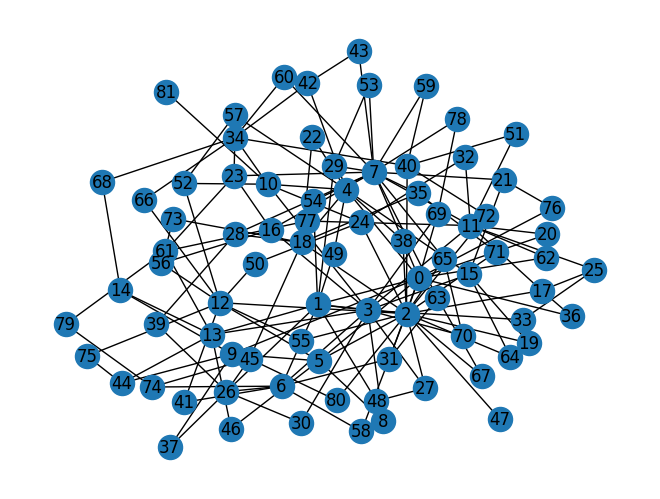

In [80]:
def preferential_attachment(n: int, m: int):
    if n <= m:
        raise ValueError(f"Parameters are not valid (m >= 1 and m < n). Input values: m = {m}, n = {n}")

    random_graph = nx.empty_graph(1)
    probability = [0,]

    for new_node in range(1, n):

        if len(probability)<m:
            neighbors=probability.copy()
        else:
            neighbors = random.sample(probability, m)

        for n in neighbors:
            random_graph.add_edge(new_node, n, length=1)
            probability.append(n)
            probability.append(new_node)

    return random_graph


pa_random_graph = preferential_attachment(82, 2)
nx.draw(pa_random_graph, with_labels=True)

### Average Degree of Original Graph

We will use the function `avgDegree()` that we defined in week 1 to compute the average degree of the real graph.

In [81]:
average_degree_G = avgDegree(G)
print(f"Our graph's average degree is: {average_degree_G}")

Our graph's average degree is: 3.951219512195122


### The Right $m$

We define the function `find_best_m_value()`, which generates 10 random graphs for different $m$ values, specified in the `max_m` parameter, computes the average difference between the average degree from the random graph and the real graph, and stores it to a list. We then choose as  the right $m$ value the one that has the smallest average degree difference with the real graph.

In [82]:
def find_best_m_value(n: int, max_m: int):
    potential_ms = []
    for m in range(1, max_m+1):
        iteration_degree_differences=0
        for i in range(10):
            random_graph = preferential_attachment(n,m)
            abs_diff = abs(average_degree_G - avgDegree(random_graph))
            iteration_degree_differences+=abs_diff
        potential_ms.append(iteration_degree_differences/10)
    smallest_difference = min(potential_ms)
    return potential_ms.index(smallest_difference)+1

chosen_m = find_best_m_value(82, 10)
print(f"The m value that makes the random graph match the original graph the most is: m={chosen_m}")

The m value that makes the random graph match the original graph the most is: m=2


**Remark:** A curious thing that Yassir found is that by multiplying by 2 the average degree of a random graph generated with $m=1$ gives us the exact same average degree of the real graph, which is a curious coincidence.

In [83]:
print(f"Average degree of the real graph:          {average_degree_G}")
print(f"2xAverage degree of a random graph (m=1):  {2*avgDegree(preferential_attachment(82,1))}")


Average degree of the real graph:          3.951219512195122
2xAverage degree of a random graph (m=1):  3.951219512195122


### Comparison of Characteristics

Text(0, 0.5, 'number of nodes')

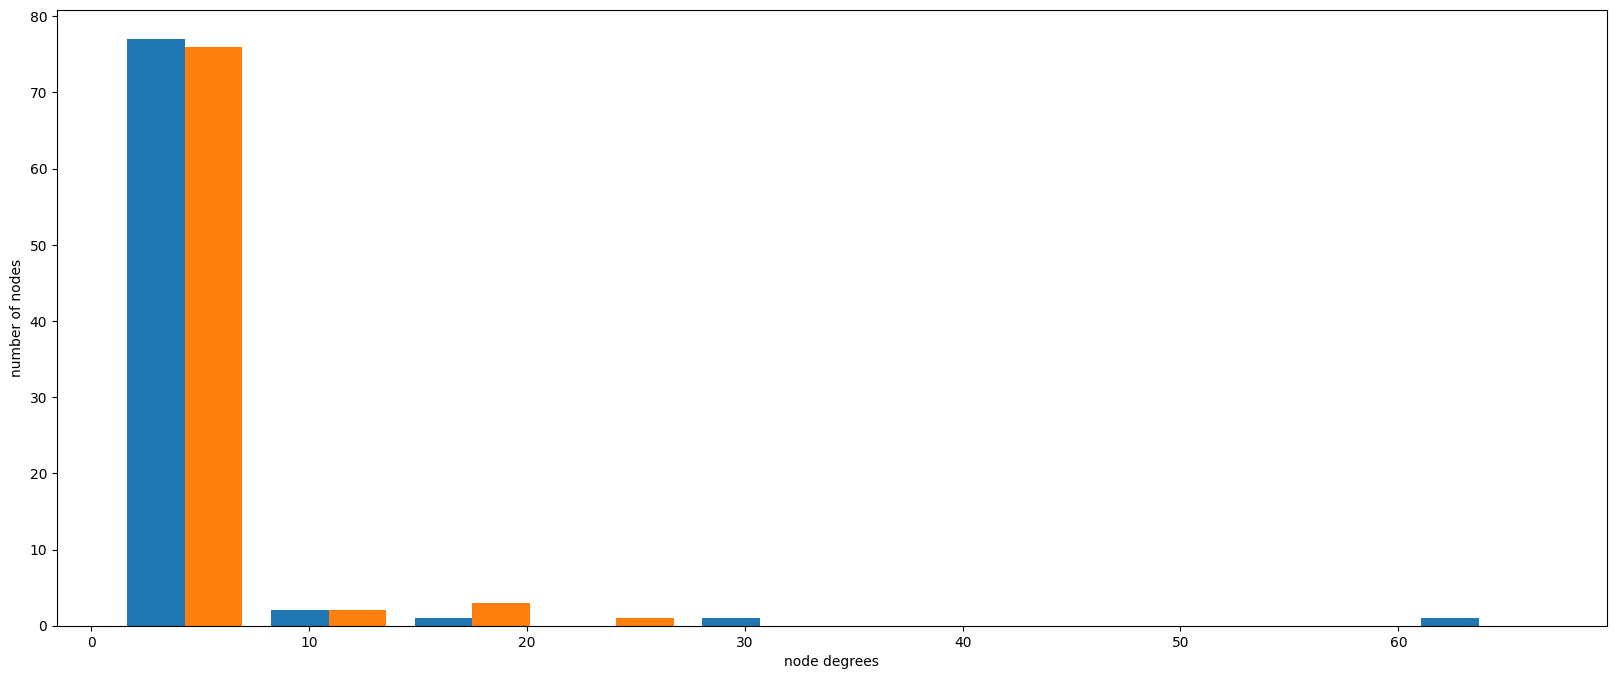

In [84]:
pa_random_graph = preferential_attachment(82, chosen_m)
degree_values_G = [degree for node, degree in G.degree()]
degree_values_rdg = [degree for node, degree in pa_random_graph.degree()]
f = [degree_values_G, degree_values_rdg]

plt.figure(figsize=(20,8))
plt.hist(f)
plt.xlabel("node degrees")
plt.ylabel("number of nodes")

From the figure we deduce that the preferential attachment random graph is a close approximation of our graph, in fact the degree distribution is similar; large number of nodes that have a smaller degree (between 1 and 7) , some nodes with high degree, however the only difference is the presence of one node with really high degree ( "Frank" ), to make our model more close to the real graph we can give more weight to the nodes that have higher degree, for example, once a node reaches a degree of ten we add some weight to it.
For example when a node reaches 10 for the degree, in each iteration we will add 3 identic nodes to the list "probability", doing this we will help one or two nodes that have the largest degree in the first 10 iteration, to reach a greater value in the end that is approximately the value of node "Frank".

Text(0, 0.5, 'number of nodes')

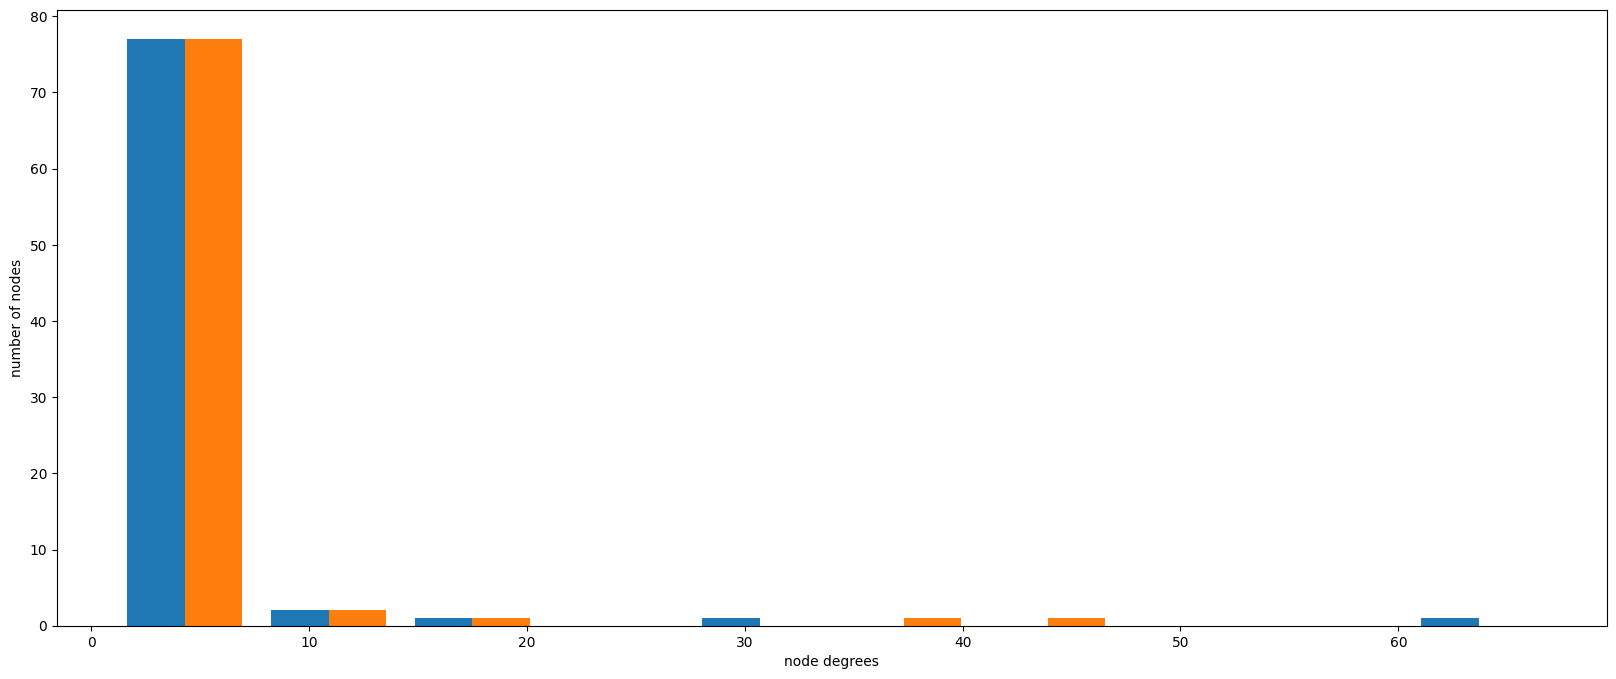

In [85]:
def preferential_attachment_variant(n: int,m: int):

    if n <= m:
        raise ValueError("n must be greater than m")

    random_graph = nx.empty_graph(m)
    probability = []


    for new_node in range(m, n):

        if probability == []:
            for n in range(m):
                random_graph.add_edge(new_node, n, length=1)
                probability.append(n)
                probability.append(new_node)
            
        else:
            for node in random_graph.nodes():
                if probability.count(node) >= 10:
                    for i in range(3):
                        probability.append(node)
            neighbors = random.sample(probability, m)
            for n in neighbors:
                random_graph.add_edge(new_node, n, length=1)
                probability.append(n)
                probability.append(new_node)

    return random_graph



random_graph = preferential_attachment_variant(82,2)
degree_values_G = [degree for node, degree in G.degree()]
degree_values_rdg = [degree for node, degree in random_graph.degree()]
f = [degree_values_G, degree_values_rdg]

plt.figure(figsize=(20,8))
plt.hist(f)
plt.xlabel("node degrees")
plt.ylabel("number of nodes")


# Week 10

### Bass Contagion Model

To simulate a propagation of a certain phenomenon in a network under the Bass Contagion model, we implemented the `simulation_Bass_contagion()` function which takes as input:
- A graph
- A list *I* of active nodes
- A float number *sa* that represents the probability of self-activation
- A float number *q* which represents the probability of a node to get active after meeting an active node
- A time limiter *time_limit* that stops the propagation
- A parameter *draw_graph* set by default to `True` to visualize the graph during the process. 

The first step is to set the nodes in *I* as **active** and the rest as **inactive**. Then, in each iteration, we iterate over all inactive nodes, where they get activated with probability *sa*. If not, we take one of its neighbors randomly (meeting), and if the neighbor is active, with probability *q* the node gets activated.

This process is synchronous, which means that we update the status of each node after all nodes get visited. We use also a dictionary *number_infected* to track the number of infected (active) nodes after each iteration and we draw the graph to visualize the propagation. After we reach *time_limit*, we return the dictionary *number_infected*.

In [ ]:
def simulation_Bass_contagion(graph, I:list, sa:float, q:float, time_limit:int, draw_graph=True):
    nodes = graph.nodes()
    
    for node in nodes:
        if node in I:
            nodes[node]['category'] = "Active"
        else:
            nodes[node]['category'] = "Inactive"
    color_map = {'Inactive':'#95D2EC', 'Active':'#D01B1B'}
    
    number_infected = {0: len(I)}

    contaged_after_t = []
    t=0

    while t <= time_limit:
        for node in nodes:
            
            if node not in I:
                if random.uniform(0, 1) <= sa:
                    nodes[node]['category'] = "Active"
                    contaged_after_t.append(node)
                    
                else:
                    category_one_rd_neighbor = nodes[random.choice(predecessors[node])]['category']
                    if category_one_rd_neighbor == 'Active' and random.uniform(0, 1) <= q:
                        nodes[node]['category'] = "Active"
                        contaged_after_t.append(node)
            
        for node in contaged_after_t:
            I.append(node)
        
        contaged_after_t = []
        t+=1
        number_infected[t] = len(I)

        if draw_graph == True:
            nx.draw(graph,node_size=150,with_labels=True, node_color=[color_map[G.nodes[node]['category']] for node in G])
            plt.show()
    return number_infected

### Number of Activated Agents at a Fixed Time T

In this part, we want to analyze how the number of activated nodes changes corresponding to the time *T*, so we use the returned value of `simulation_Bass_contagion()`, which is a dictionary *number_infected* that stores the number of infected nodes at each time *t*. 

We will run the function with parameters *sa* equal to $\frac{1}{41}$, *q* equal to $\frac{1}{20}$, *time_limit* equal to 100, and as active node we choose "AMDURSKY". 

The results change corresponding to the parameters, especially when we change the initial active nodes. But our goal is to see how the number of active nodes changes over time for a choosen outbreak. We will plot the results of our function. 

The approximation of this process obtained from the solution of the continous time model:
$F(t) = \frac{1-e^{-(sa + q)*t}}{1+\frac{q}{sa}*e^{-(sa + q)*t}}$

In [ ]:
I = [21]
init_infected = len(I)
sa = 1/41
q = 1/20
time_limit = 100

number_infected = simulation_Bass_contagion(G, I, sa, q, time_limit, draw_graph=False)

list_iterations = list(number_infected.keys())
list_num_infected = list(number_infected.values())

math_approximation = [82*((1 - math.exp(-(sa + q)*t))/(1 + (q/sa)*(math.exp(-(sa + q)*t)))) if t != 0 else init_infected for t in list_iterations]


plt.figure(figsize=(15,7))
plt.plot(list_iterations, list_num_infected)
plt.plot(list_iterations, math_approximation)
plt.xlabel("T")
plt.ylabel("num_infected")

As we can see from the plot, the values of the infected nodes at each time *t* are approximately equal to the ones that the solution of the continous model suggests (this result is valid for any set of parameters). 

For these particular parameters we see that between time equal to 2 and 40 there is a high increase of infected nodes in each stage and after this interval the the rate of propagation starts getting lower and lower which can be explained by the fact that most of the nodes are activated. 